In [1]:
import numpy as np
import matplotlib
import sklearn
import pandas as pd

In [2]:
%pylab inline
titanic = pd.read_csv("train.csv")

Populating the interactive namespace from numpy and matplotlib


In [3]:
titanic.Age.mean()

29.69911764705882

In [4]:
titanic['Gender'] = titanic['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
print (titanic.groupby('Pclass').aggregate(np.mean))
X = titanic.as_matrix(columns = ['Pclass','Gender','Fare'])
y = titanic['Survived'].tolist()
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(X,y)

        PassengerId  Survived        Age     SibSp     Parch       Fare  \
Pclass                                                                    
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687   
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183   
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550   

          Gender  
Pclass            
1       0.564815  
2       0.586957  
3       0.706721  


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

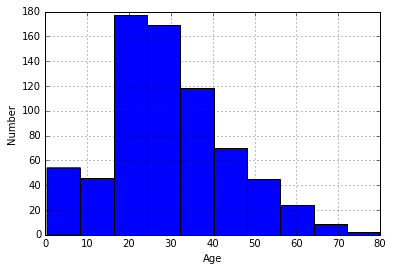

In [5]:
import matplotlib.pyplot as plt
titanic['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

('seaborn', '0.7.0')


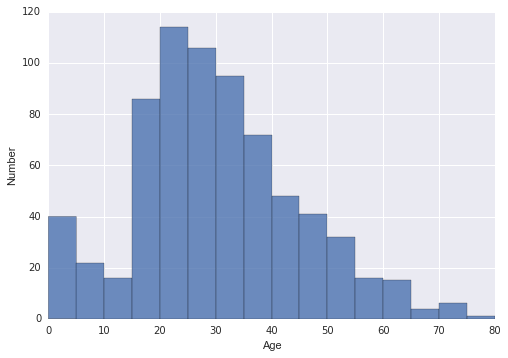

In [6]:
import seaborn
print('seaborn', seaborn.__version__)
titanic['Age'].dropna().hist(bins=16, range=(0,80), alpha = .8)
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

In [7]:
print (titanic.groupby('Gender').aggregate(np.mean))
median_ages = np.zeros((2,3))

for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = titanic[(titanic['Gender'] == i) & \
                              (titanic['Pclass'] == j+1)]['Age'].dropna().median()

median_ages

        PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Gender                                                                   
0        431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
1        454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Gender             
0       44.479818  
1       25.523893  


array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [8]:
titanic['AgeFill'] = titanic['Age']

titanic[ titanic['Age'].isnull() ][['Gender','Pclass','Age', 'AgeFill']].head(9)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN


In [9]:
for i in range(0, 2):
    for j in range(0, 3):
        titanic.loc[ (titanic.Age.isnull()) & (titanic.Gender == i) & (titanic.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]

titanic[ titanic['Age'].isnull() ][['Gender','Pclass','Age', 'AgeFill']].head(9)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0


In [10]:
titanic['AgeIsNull'] = pd.isnull(titanic.Age).astype(int)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic['Age*Class'] = titanic.AgeFill * titanic.Pclass

In [11]:
print (titanic.dtypes[titanic.dtypes.map(lambda x: x=='object')])
train_data = titanic.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1) 
train_data = train_data.drop(['Age', 'PassengerId'], axis = 1)
train_data = train_data.as_matrix()
train_data

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object


array([[  0. ,   3. ,   1. , ...,   0. ,   1. ,  66. ],
       [  1. ,   1. ,   1. , ...,   0. ,   1. ,  38. ],
       [  1. ,   3. ,   0. , ...,   0. ,   0. ,  78. ],
       ..., 
       [  0. ,   3. ,   1. , ...,   1. ,   3. ,  64.5],
       [  1. ,   1. ,   0. , ...,   0. ,   0. ,  26. ],
       [  0. ,   3. ,   0. , ...,   0. ,   0. ,  96. ]])

In [12]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
result = knn.predict([[3, 5, 4, 2],])
print(iris.target_names[result])
print(knn.predict_proba([[3, 5, 4, 2],]))

['versicolor']
[[ 0.   0.8  0.2]]


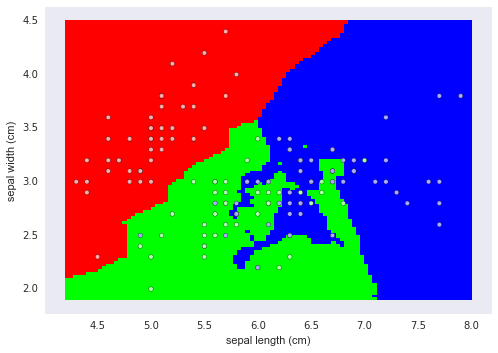

In [13]:
def plot_iris_knn(n_neighbors=3, pca=False):
    import pylab as pl
    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    cmap_bold = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

    iris = datasets.load_iris()
    if pca == False:
        X = iris.data[:, :2]  
        y = iris.target
    else:
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        X, y = iris.data, iris.target
        pca.fit(X)
        X = pca.transform(X)
        
    knn = neighbors.KNeighborsClassifier(n_neighbors)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    if pca:
        pl.xlabel('principle component no.1')
        pl.ylabel('principle component no.2')
    else:
        pl.xlabel('sepal length (cm)')
        pl.ylabel('sepal width (cm)')
    pl.axis('tight')
plot_iris_knn(3)

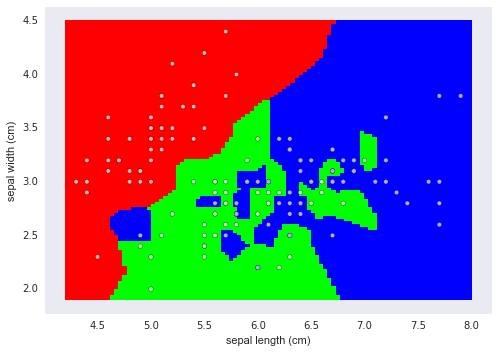

In [14]:
plot_iris_knn(1,pca=False)

In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

X, y = iris.data, iris.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[11  0  0]
 [ 0  9  0]
 [ 0  1 17]]


In [16]:
knn.score(Xtest, ytest)

0.97368421052631582